In [1]:
import matplotlib.pyplot as plt
import numpy as np


def CreateSeries(File,FreqRef):

    with open(File) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    V = [x.strip().split("\t")[1] for x in content] 
    V = np.array(V).astype(np.int)
    t = [x.strip().split("\t")[0] for x in content]
    t = np.array(t).astype(np.float)/FreqRef
    MaxT = t[-1]*FreqRef

    return t,V,MaxT



In [55]:
t,V,MaxT = CreateSeries("GNDandPlusHalf.data",10000000)
print MaxT

823906.0


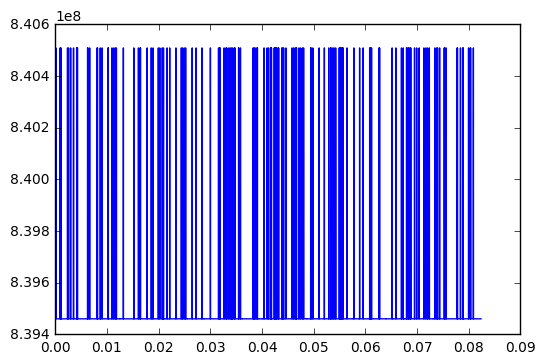

In [56]:
plt.plot(t, V)
plt.show() 

In [57]:
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]

ADC2_pins = [38,37,36,35,33,32,26,24,23]
ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC1len = len(ADC2_GPIO)


def GetV1(Volts):
    
    Map = np.zeros((len(V),34), dtype=np.int)
    for i in range(len(Volts)):
        val = V[i]
        for k in range(34):
            Map[i][k] = (val & 2**k)/2**k

    return Map



In [58]:
Map = np.asarray(GetV1(V))
Map


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

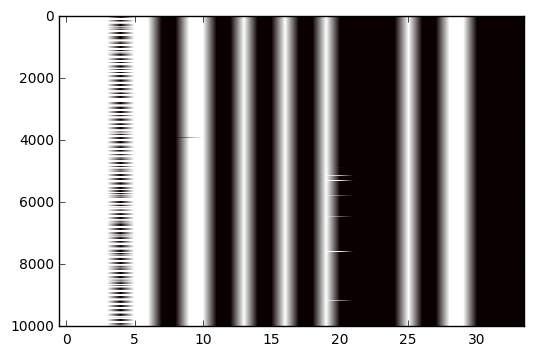

In [59]:
im = plt.imshow(Map, cmap='hot', aspect="auto")
#plt.colorbar(im, orientation='horizontal')
plt.show()

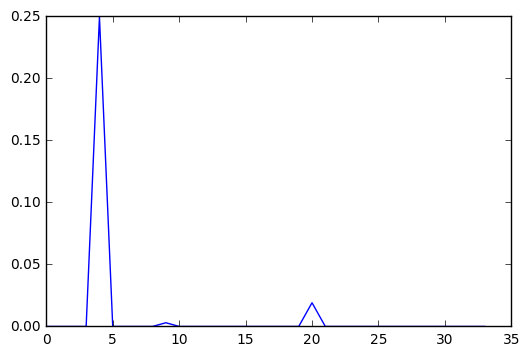

In [60]:
plt.plot(np.var(Map,0))
plt.show() 

In [61]:
for m in range(32):
    if (np.var(Map,0)[m]):
        print str(m)+" - "+str(np.var(Map,0)[m])

4 - 0.249559
9 - 0.002991
20 - 0.01911975


In [62]:
ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]
ADC2len = len(ADC2_GPIO)


def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = V[i]
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map


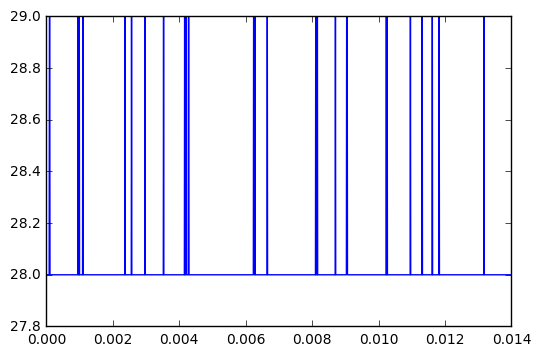

In [63]:
M = GetV2(V)[0]
plt.plot(t[0:1700],M[0:1700])
plt.show()